# Machine learning 

#### Importing the ML feeding table

In [1]:
from google.cloud import bigquery
import pandas as pd
from dotenv import load_dotenv
import os
from sklearn.cluster import KMeans
import numpy as np4
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

# Now you can use the environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")


# Create a BigQuery client
client = bigquery.Client()

# Your BigQuery query
query = """
SELECT * FROM `big-mamma-project.ML_tables.ML_table_3_booking_order_not_null`
"""

# Run the query and convert it to a pandas dataframe
ml = client.query(query,location="EU").to_dataframe()

# Now df is a pandas DataFrame containing the results of the query
ml.drop(columns="order_id",inplace=True)
ml.head(10)

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,...,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,6,27.22,<NA>,6.0,2.0,0.0,1.0,1,<NA>,<NA>
1,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,45.22,<NA>,2.0,4.0,0.0,4.0,1,<NA>,<NA>
2,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,3,20.68,<NA>,1.0,1.0,0.0,1.0,1,<NA>,<NA>
3,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,18.59,<NA>,2.0,0.0,0.0,3.0,1,<NA>,<NA>
4,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,20.28,<NA>,2.0,0.0,1.0,1.0,1,<NA>,<NA>
5,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,4,30.31,<NA>,4.0,0.0,0.0,4.0,1,<NA>,<NA>
6,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,25.86,<NA>,2.0,1.0,1.0,1.0,1,<NA>,<NA>
7,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,20.79,<NA>,2.0,0.0,0.0,1.0,1,<NA>,<NA>
8,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,2,30.42,<NA>,1.0,0.0,1.0,1.0,1,<NA>,<NA>
9,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,40.63,<NA>,2.0,0.0,1.0,2.0,1,<NA>,<NA>


## DF preparation


#### Finding and filling NAs

In [2]:
#Displaying NAs count per column
ml.isnull().sum()

Sunday                   591450
Monday                   613246
Tuesday                  615280
Wednesday                611247
Thursday                 604794
Friday                   595463
Saturday                 580022
card_payment             590786
invoice_payment          201795
cash_payment             675693
DINNER                   320106
LUNCH                    456279
AFTERNOON                650500
actual_duration           21666
covers                    21666
revenue_per_cover         21666
high_spender             597503
total_main_items          44790
total_starters_items      44790
total_desserts_items      44790
total_beverages_items     44790
total_visits                779
total_cancellations      697814
total_noshows            698064
dtype: int64

In [3]:
ml.dtypes

Sunday                     Int64
Monday                     Int64
Tuesday                    Int64
Wednesday                  Int64
Thursday                   Int64
Friday                     Int64
Saturday                   Int64
card_payment               Int64
invoice_payment            Int64
cash_payment               Int64
DINNER                     Int64
LUNCH                      Int64
AFTERNOON                  Int64
actual_duration            Int64
covers                     Int64
revenue_per_cover        float64
high_spender               Int64
total_main_items         float64
total_starters_items     float64
total_desserts_items     float64
total_beverages_items    float64
total_visits               Int64
total_cancellations        Int64
total_noshows              Int64
dtype: object

# NAs filling methods

#### Model-Based imputation

In [4]:
from sklearn.impute import KNNImputer

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
ml_imput = pd.DataFrame(imputer.fit_transform(ml), columns=ml.columns)
ml_imput.isnull().sum()

KeyboardInterrupt: 

#### Correlation check and heatmap

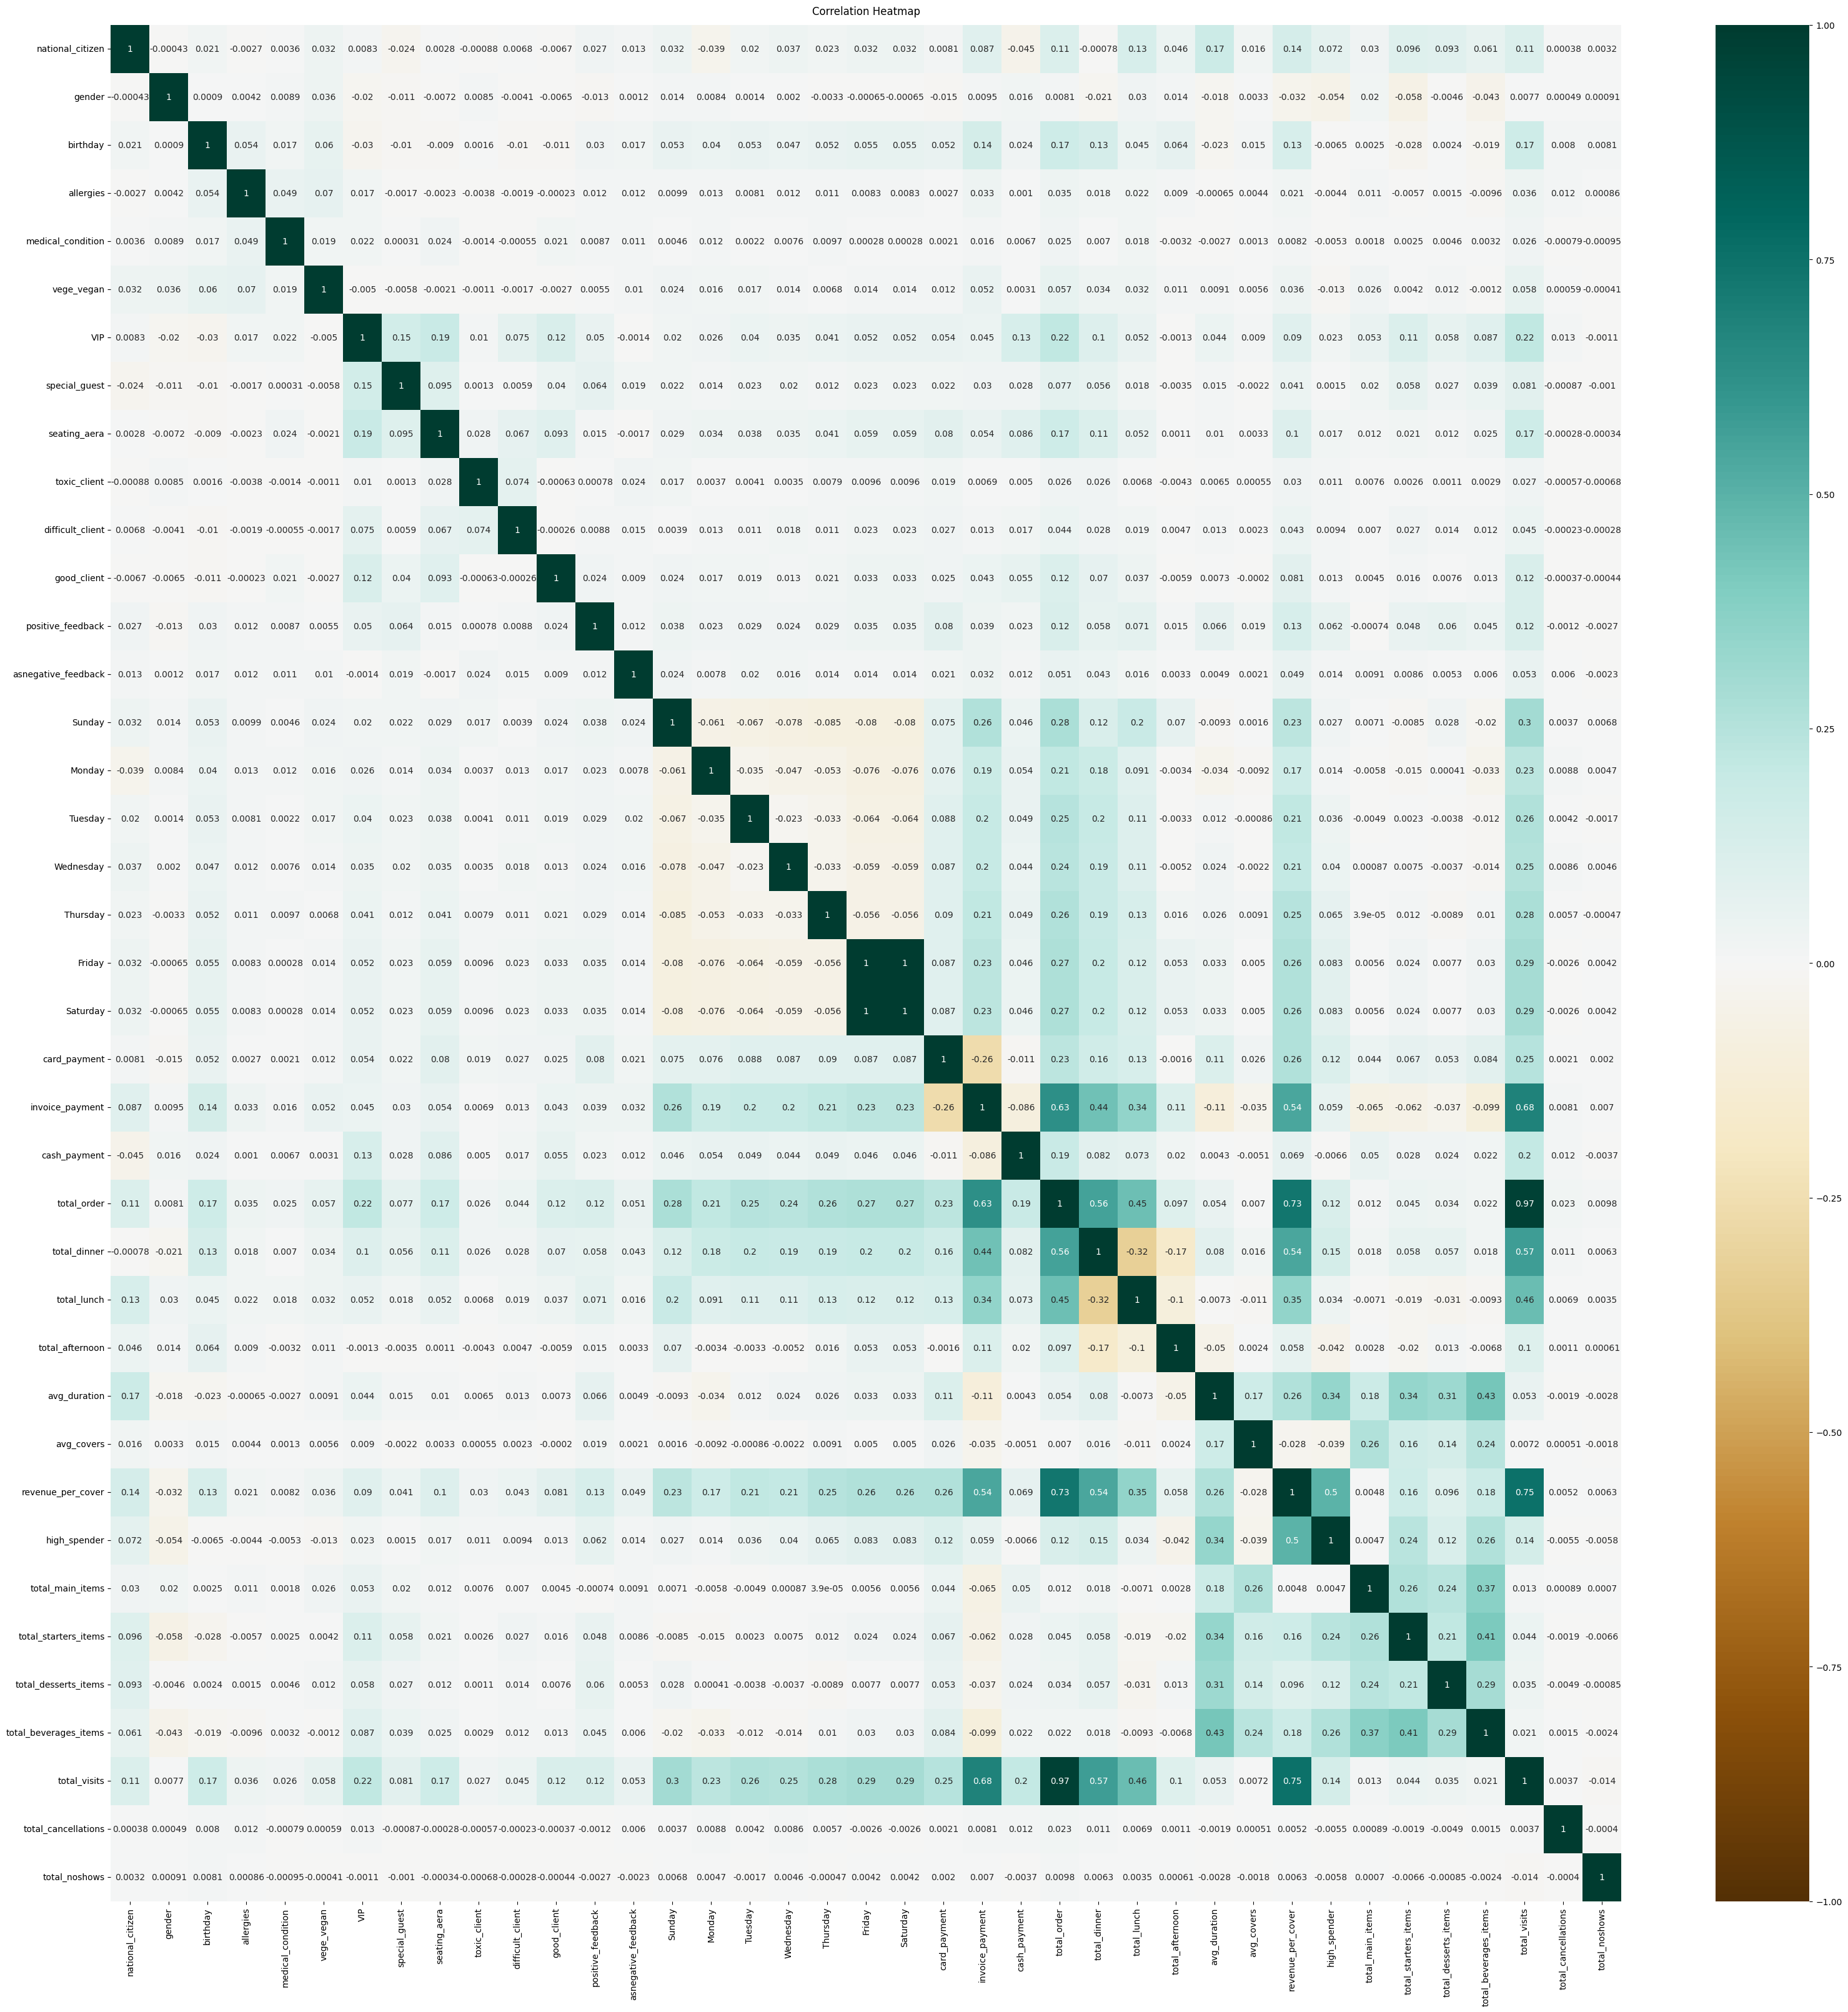

In [23]:
# Increase the size of the heatmap.
plt.figure(figsize=(39, 39))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(ml.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

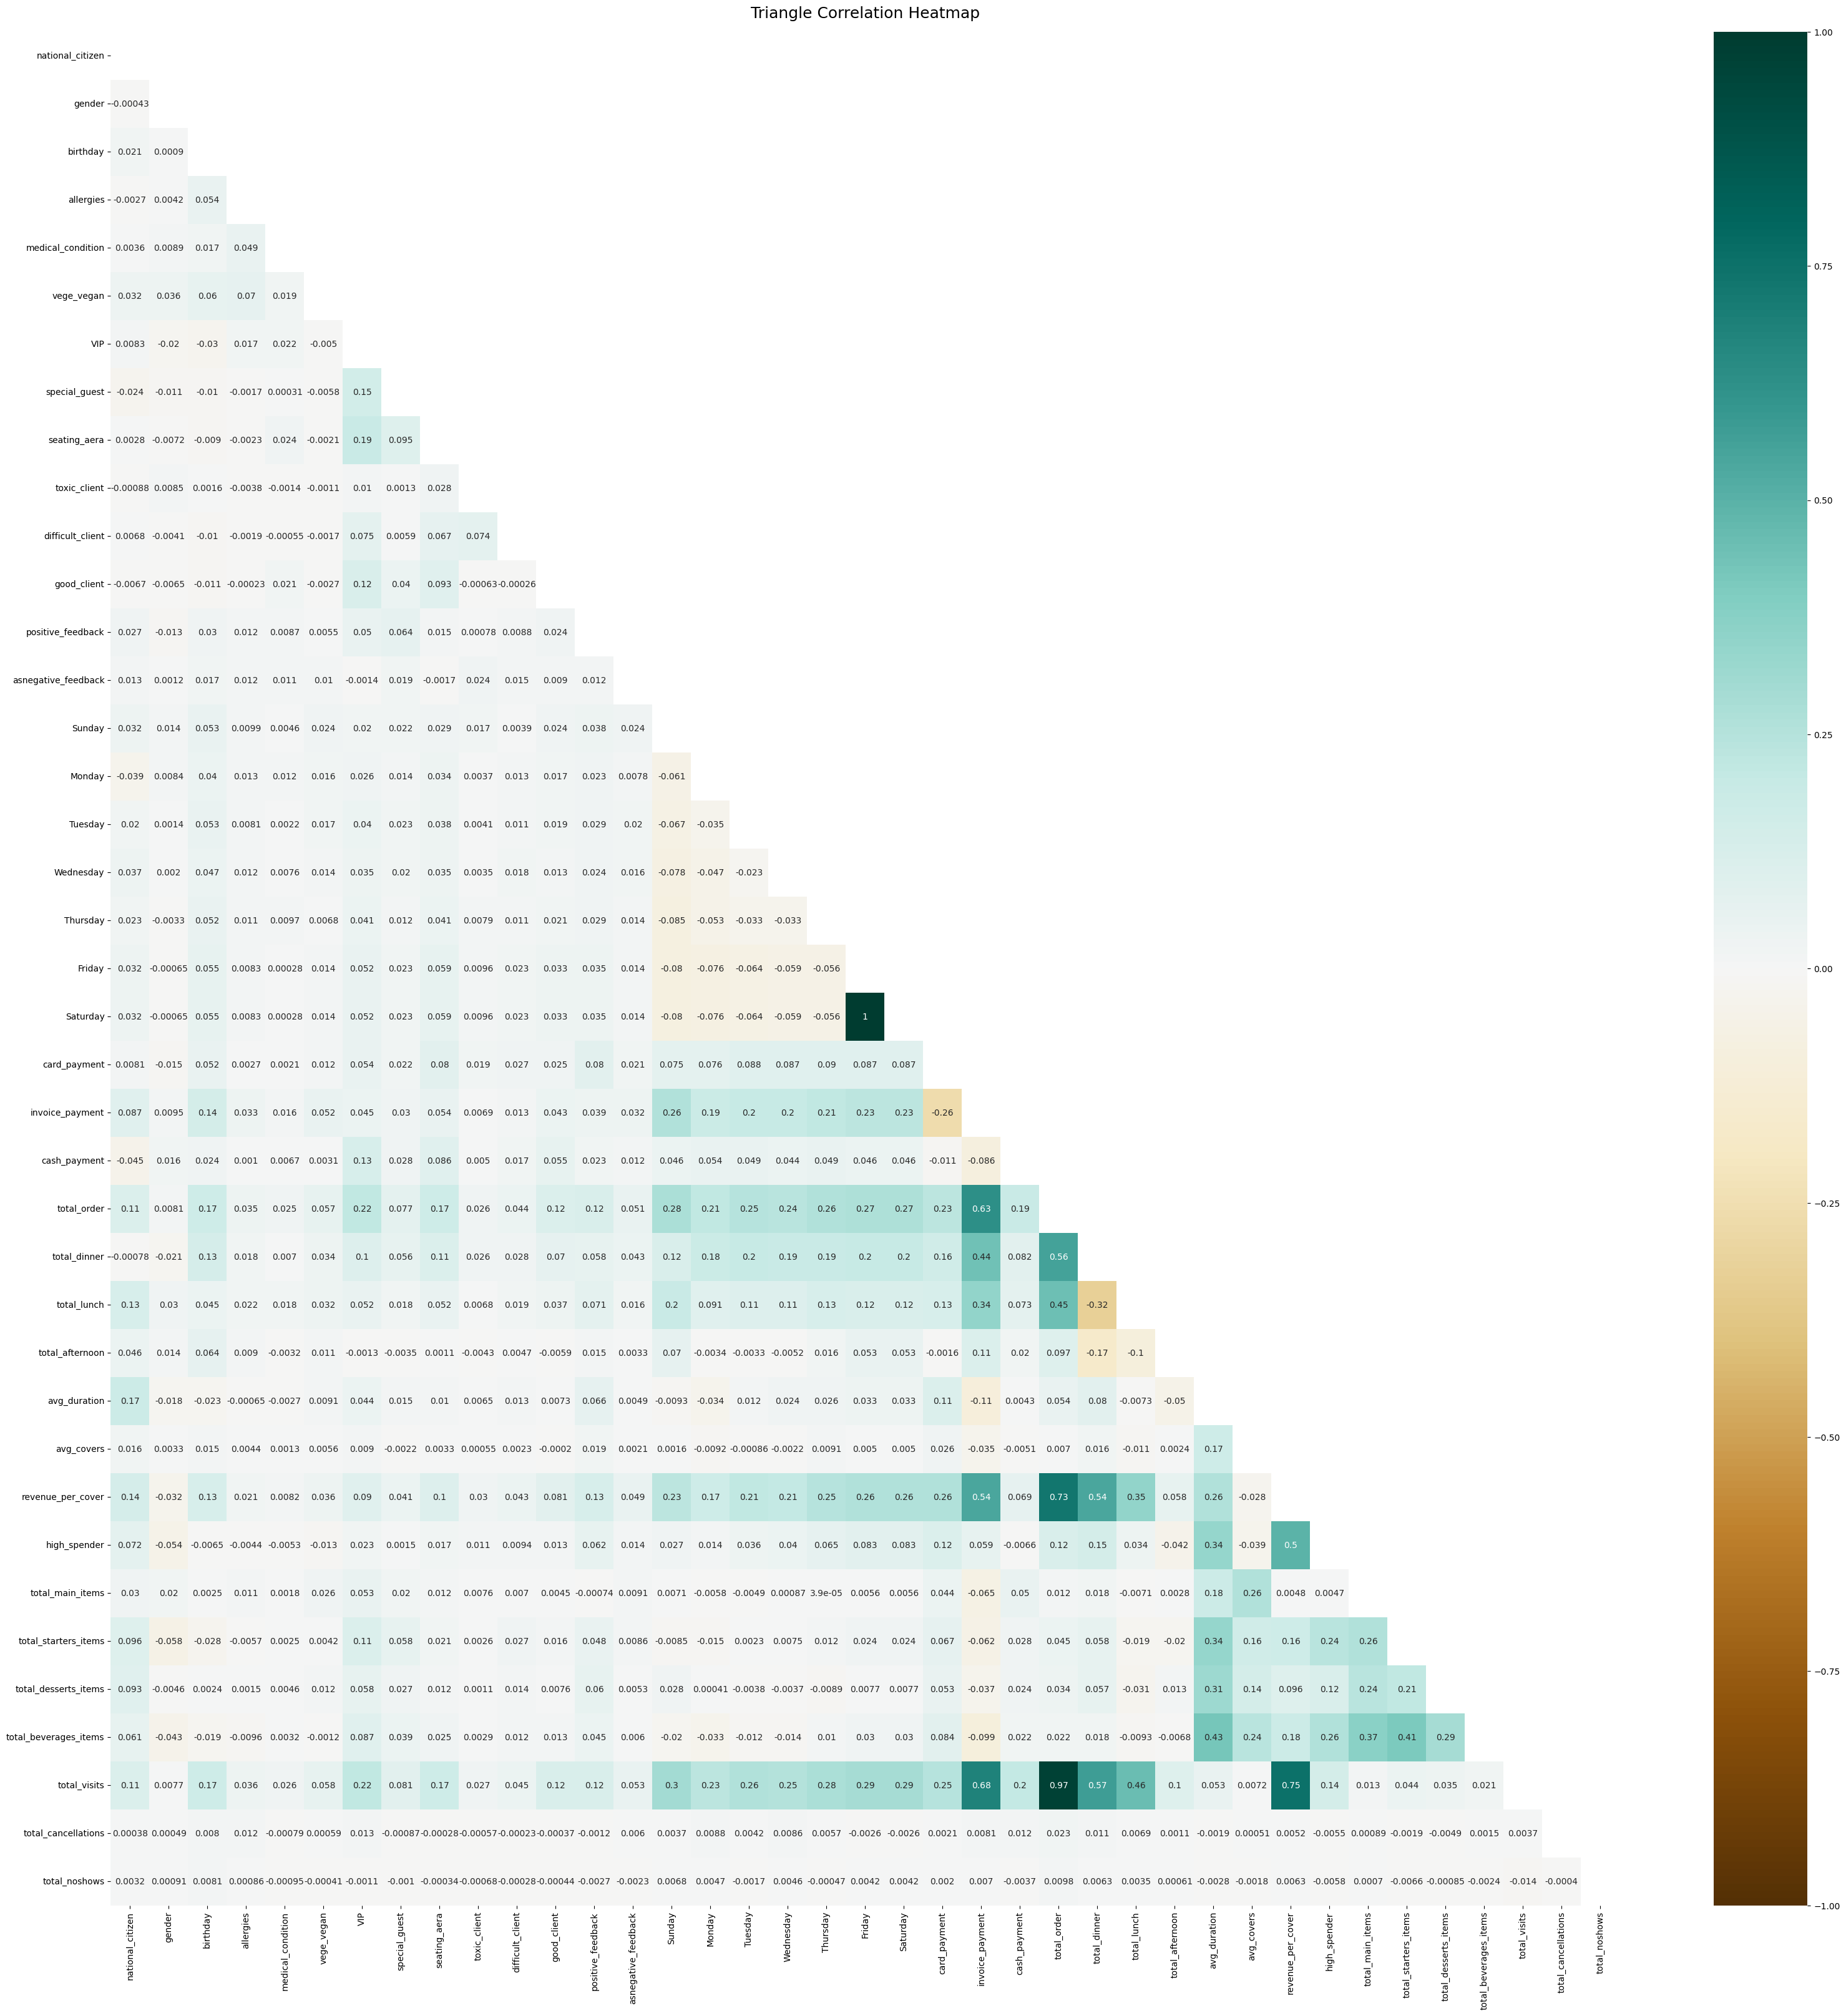

In [27]:
plt.figure(figsize=(39, 39))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(ml.corr(), dtype=bool))
heatmap = sns.heatmap(ml.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

#### Distribution check

In [13]:
ml_distribution = pd.DataFrame(ml.sum(axis=0))
ml_distribution.rename(columns={0:'count'},inplace=True)
ml_distribution['percent'] = round((ml_distribution['count']/144930)*100,2)
ml_distribution.sort_values(by='percent',ascending=True)

,count,percent
total_cancellations,30.0,0.02
difficult_client,26.0,0.02
seating_aera,41.0,0.03
total_noshows,43.0,0.03
good_client,59.0,0.04
toxic_client,149.0,0.1
medical_condition,243.0,0.17
special_guest,324.0,0.22
VIP,411.0,0.28
asnegative_feedback,1486.0,1.03


In [ ]:
ml.drop(columns=['difficult_client','seating_aera','good_client','toxic_client','medical_condition','special_guest','VIP'],inplace=True)


#### Scaling features


In [6]:
#Scaling the ML table and storing the output 
#Initializing and training scaler 
scaler=StandardScaler()
ml_scaled=scaler.fit_transform(ml)


In [7]:
#Checking our scaled features 
ml_scaled_df=pd.DataFrame(ml_scaled,columns=scaler.get_feature_names_out())
ml_scaled_df

,national_citizen,gender,birthday,allergies,medical_condition,vege_vegan,VIP,special_guest,seating_aera,toxic_client,...,avg_covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
0,-1.547765,1.529521,-1.045279,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,1.059291,0.022984,0.0,0.888578,0.157263,0.802511,-0.263183,0.101827,1.693637,-0.232667
1,0.646093,0.061135,1.648276,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,0.058652,3.642518,0.0,-0.198399,0.935863,-0.769797,-0.025898,3.912001,1.693637,10.318981
2,0.646093,-1.407252,0.301499,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.850717,0.611878,-0.232667
3,-1.547765,1.529521,-1.045279,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.850717,-0.469882,-0.232667
4,0.646093,0.061135,1.648276,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,0.058652,-0.794764,NaN,0.267448,-1.088498,0.016357,-1.212321,0.101827,1.693637,-0.232667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144925,0.646093,1.529521,-1.045279,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,0.558971,-0.681455,NaN,NaN,NaN,NaN,NaN,0.101827,-0.469882,-0.232667
144926,-1.547765,0.061135,-1.045279,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,1.059291,0.249094,0.0,NaN,NaN,NaN,NaN,0.101827,-0.469882,-0.232667
144927,0.646093,1.529521,-1.045279,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,-0.441668,2.853415,0.0,NaN,NaN,NaN,NaN,0.101827,-0.469882,-0.232667
144928,-1.547765,1.529521,-1.045279,-0.146514,-0.042041,-0.131577,-0.043343,-0.042758,-0.013603,-0.037096,...,0.558971,-0.283735,NaN,NaN,NaN,NaN,NaN,0.101827,-0.469882,-0.232667


#### First clustering test 

In [15]:
#Lauching clustering prediction
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(ml_scaled)
labels_scaled=kmeans.predict(ml_scaled)

#Applying labels to the original dataframe
ml['labels']=labels_scaled
ml_distrib=ml.groupby('labels',as_index=True)['national_citizen'].count()

#Printing number + graph to vizualize 
print(ml_distrib)
sns.countplot(ml,x='labels')

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Silhouette and Elbow check to find the proper number of cluster 

#### Silhouette method 

In [ ]:

# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np
# import matplotlib.style as style

# range_n_clusters = [2, 3, 4, 5, 6]
# silhouette_avg_n_clusters = []

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     # fig, (ax1, ax2) = plt.subplots(1, 2)
#     # fig.set_size_inches(18, 7)

#     # # The 1st subplot is the silhouette plot
#     # # The silhouette coefficient can range from -1, 1 but in this example all
#     # # lie within [-0.1, 1]
#     # ax1.set_xlim([-0.1, 1])
#     # # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # # plots of individual clusters, to demarcate them clearly.
#     # ax1.set_ylim([0, len(ml_scaled) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, n_init=5, random_state=0)
#     cluster_labels = clusterer.fit_predict(ml)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(ml, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     silhouette_avg_n_clusters.append(silhouette_avg)
#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(ml, cluster_labels)

# #     y_lower = 10
# #     for i in range(n_clusters):
# #         # Aggregate the silhouette scores for samples belonging to
# #         # cluster i, and sort them
# #         ith_cluster_silhouette_values = \
# #             sample_silhouette_values[cluster_labels == i]

# #         ith_cluster_silhouette_values.sort()

# #         size_cluster_i = ith_cluster_silhouette_values.shape[0]
# #         y_upper = y_lower + size_cluster_i

# #         color = cm.nipy_spectral(float(i) / n_clusters)
# #         ax1.fill_betweenx(np.arange(y_lower, y_upper),
# #                           0, ith_cluster_silhouette_values,
# #                           facecolor=color, edgecolor=color, alpha=0.7)

# #         # Label the silhouette plots with their cluster numbers at the middle
# #         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

# #         # Compute the new y_lower for next plot
# #         y_lower = y_upper + 10  # 10 for the 0 samples

# #     ax1.set_title("The silhouette plot for the various clusters.")
# #     ax1.set_xlabel("The silhouette coefficient values")
# #     ax1.set_ylabel("Cluster label")

# #     # The vertical line for average silhouette score of all the values
# #     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# #     ax1.set_yticks([])  # Clear the yaxis labels / ticks
# #     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# #     # 2nd Plot showing the actual clusters formed
# #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
# #     ax2.scatter(ml_scaled[:, 0], ml_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
# #                 c=colors, edgecolor='k')

# #     # Labeling the clusters
# #     centers = clusterer.cluster_centers_
# #     # Draw white circles at cluster centers
# #     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
# #                 c="white", alpha=1, s=200, edgecolor='k')

# #     for i, c in enumerate(centers):
# #         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
# #                     s=50, edgecolor='k')

# #     ax2.set_title("The visualization of the clustered data.")
# #     ax2.set_xlabel("Feature space for the 1st feature")
# #     ax2.set_ylabel("Feature space for the 2nd feature")

# #     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
# #                   "with n_clusters = %d" % n_clusters),
# #                  fontsize=14, fontweight='bold')

# # plt.show()


# # style.use("fivethirtyeight")
# # plt.plot(range_n_clusters, silhouette_avg_n_clusters)
# # plt.xlabel("Number of Clusters (k)")
# # plt.ylabel("silhouette score")
# # plt.show()


#### Elbow method 

In [ ]:
#Elbow method
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:
     kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(ml_scaled)
     inertias.append(kmeans.inertia_)
print(inertias )

In [ ]:
#Plotting the inertias
import plotly.express as px 
fig = px.line(inertias)
fig.show()

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,n_init="auto")
 kmeans.fit(ml_scaled)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

# Exploring results

##### Heatmap

In [ ]:
# Analyzing Cluster Results
import matplotlib.pyplot as plt
import seaborn as sns

#Creating heatmap
cm = sns.light_palette("green", as_cmap=True)
#a remettre en ml au lieu de ml_scaled
ml.groupby('labels')[ml.columns[1:-1]].mean().style.background_gradient(cmap=cm)

#### Scatter plot

In [ ]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Transform the data
pca = PCA(2)
ml_results= pca.fit_transform(ml)


#Getting unique labels
u_labels = np.unique(labels_scaled)
 
#plotting the results:
for i in u_labels:
    plt.scatter(ml_results[labels_scaled == i , 0] , ml_results[labels_scaled == i , 1] , label= i)
plt.legend()
plt.show()

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels_scaled)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ml_results[labels_scaled == i , 0] , ml_results[labels_scaled == i , 1] , label= i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()